In [1]:
import os
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
experiment_dir = '../work_dirs/aagcn/aagcn_pyskl_ntu60_xsub_3dkp'

In [24]:
# interests = ['j_0.01_random8_convnew','j_0.01_random8_convnew_gcl']
# names = ['Random8 ConvNew', 'Random8 ConvNew GCL']
interests = ['j_0.01_random8_convnew_devlstm', 'j_0.01_random8_convnew']
names = ['DevLSTM', 'MSTCN']
# interests = ['j_0.01_spatial2_conv','j_0.01_spatial2_conv_gcl']
# names = ['3PC 2PC2 Conv', '3PC 2PC2 Conv + GCL']

In [19]:
def getLastResult(file_name, name = ''):
    if name == 'j_0.01_random8_convnew_devlstm':
        return '0.8986'
    with open(file_name, 'r') as file:
        data = "\n".join(file.readlines()[-9:])
    top1_accs = re.findall('top1_acc: ([0-9.]+)', data)
    return top1_accs[-2]

In [7]:
def accumulateHistory(history, name = ''):
    train = dict()
    train_ins = dict()
    train_sem = dict()
    valid = dict()
    for entry in history:
        if entry['mode'] == 'train':
            try:
                train[entry['epoch']].append(entry['loss_cls'])
            except KeyError:
                train[entry['epoch']] = [entry['loss_cls']]
            if 'loss_instance' in entry:
                try:
                    train_ins[entry['epoch']].append(entry['loss_instance'])
                except KeyError:
                    train_ins[entry['epoch']] = [entry['loss_instance']]
            if 'loss_instance' in entry:
                try:
                    train_sem[entry['epoch']].append(entry['semantic_loss'])
                except KeyError:
                    train_sem[entry['epoch']] = [entry['semantic_loss']]
        elif entry['mode'] == 'val':
            valid[entry['epoch']] = entry['top1_acc']
    train = {k: np.mean(v) for k, v in train.items()}
    train_sem = {k: np.mean(v) for k, v in train_sem.items()}
    train_ins = {k: np.mean(v) for k, v in train_ins.items()}
    return train, valid, train_sem, train_ins

[1.2521996800000001, 0.5808142399999999, 0.44270135999999993, 0.36778272000000006, 0.31341991999999996, 0.26955680000000004, 0.23032927999999997, 0.1853404, 0.14389992000000001, 0.10280816000000001, 0.06780504, 0.03530639999999999, 0.016697199999999995, 0.0103108, 0.00836608, 0.00783448]
[1.3994665600000002, 0.7041312000000001, 0.5658997600000001, 0.4887936000000001, 0.43100527999999994, 0.38585736, 0.33952232000000004, 0.28983791999999997, 0.24525271999999998, 0.19259223999999991, 0.14037423999999996, 0.08553616, 0.04208736, 0.0202528, 0.013565279999999997, 0.0114956]


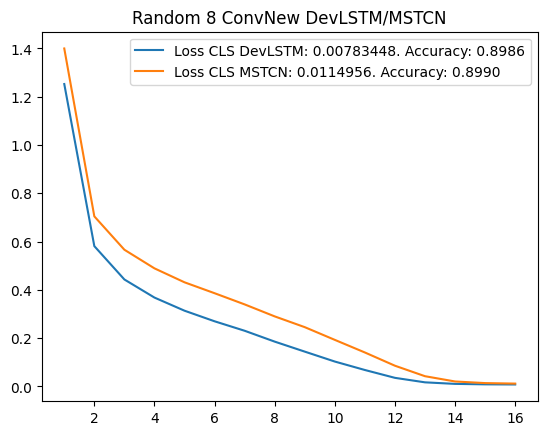

In [27]:
count = 0
for name, interest in zip(names, interests):

    file_template = os.path.join(experiment_dir, interest, "*.log")
    glob_files = glob.glob(file_template)
    glob_files.sort(reverse = True)
    log_file = glob_files[0]
    # print(name)
    result = getLastResult(log_file, interest)
    file_template = os.path.join(experiment_dir, interest, "*.log.json")
    glob_files = glob.glob(file_template)
    glob_files.sort(reverse = True)
    log_file = glob_files[0]

    
    with open(log_file, 'r') as file:
        history = [json.loads(line.strip()) for line in file.readlines()][1:]
    train, _, train_sem, train_ins = accumulateHistory(history)
    epochs = list(train.keys())
    losses = list(train.values())
    print(losses)
    plt.plot(epochs, losses, label = f"Loss CLS {name}: {losses[-1]}. Accuracy: {str(result)}")
    # if count == 0:
    # plt.text(epochs[-7], losses[-1], round(losses[-1], 4))
        # count += 1
    if len(train_sem.keys()) > 0:
        epochs = list(train_sem.keys())
        losses = list(train_sem.values())
        plt.plot(epochs, losses, label = f"Loss Semantic. {str(result)}")
        plt.text(epochs[-1], losses[-1], round(losses[-1], 4))
    if len(train_ins.keys()) > 0:
        epochs = list(train_ins.keys())
        losses = list(train_ins.values())
        plt.plot(epochs, losses, label = f"Loss Instance. {str(result)}")
        plt.text(epochs[-1], losses[-1], round(losses[-1], 4))
    plt.legend()
plt.title("Random 8 ConvNew DevLSTM/MSTCN")
plt.show()

In [10]:
# for name, interest in zip(names, interests):

#     file_template = os.path.join(experiment_dir, interest, "*.log")
#     glob_files = glob.glob(file_template)
#     glob_files.sort(reverse = True)
#     log_file = glob_files[0]
    
#     result = getLastResult(log_file)

#     file_template = os.path.join(experiment_dir, interest, "*.log.json")
#     glob_files = glob.glob(file_template)
#     glob_files.sort(reverse = True)
#     log_file = glob_files[0]

    
#     with open(log_file, 'r') as file:
#         history = [json.loads(line.strip()) for line in file.readlines()][1:]
#     _, valid, _ = accumulateHistory(history)
#     epochs = list(valid.keys())
#     accuracies = list(valid.values())
#     plt.plot(epochs, accuracies, label = f"{name}. {str(result)}")
#     # plt.text(epochs[-10], accuracies[-1], result)
#     plt.legend()
# plt.show()